In [94]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from scipy.stats import norm, skew, kurtosis
import matplotlib.mlab as mlab

import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.hh_decomp import window_tukey, window_field
from scripts.common import *

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/512x724x256/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr7/1024x1448x512/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(-Ly/2.,Ly/2.,Ny)

flist = glob.glob(directory+"autocorr*")
flist.sort()
print([f.split('/')[-1] for f in flist])

tlist,dlist,rates = growth_rates(directory+'shearlayer_')

Params for this run:
	Mc = 0.8
	Re = 1000.0
	rr = 7.0
Params for this grid:
	N = 1024x1448x512
	L = 100.0x125.0x50.0
['massflux_0008.dat', 'massflux_0009.dat', 'massflux_0010.dat', 'massflux_0011.dat', 'massflux_0012.dat', 'massflux_0013.dat', 'massflux_0014.dat']


(0.8, 7.0)


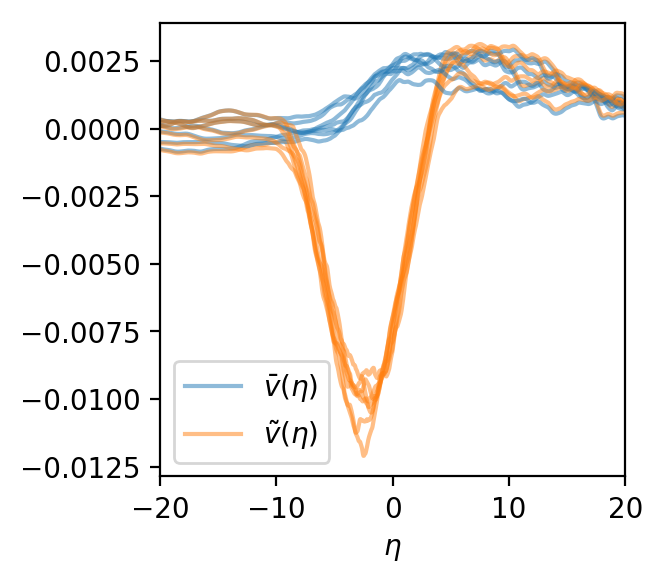

In [104]:

plt.figure(figsize=(3,3),dpi=200)
for fname in flist:
    tID = fname.split('/')[-1]
    tID = tID.split('_')[-1]
    tID = int(tID.split('.')[0])
    time = nml.read_time(directory,tID)

    # Get dtheta
    idx = np.argmin(abs(tlist-time))
    dtheta = dlist[idx]
    eta = y/dtheta
    
    ubar,vbar,utilde,vtilde,ru,rv = get_data(fname)
    plt.plot(eta,vbar/inp.du,color='C0',alpha=0.5)
    plt.plot(eta,vtilde/inp.du,color='C1',alpha=0.5)


mat /= len(flist)
plt.xlim([-20,20])
plt.xlabel(r'$\eta$')
plt.legend([r'$\bar{v}(\eta)$',r'$\tilde{v}(\eta)$'])
print(inp.Mc,inp.rr)


0.2
0.8
2.0
(2.0, 7.0)


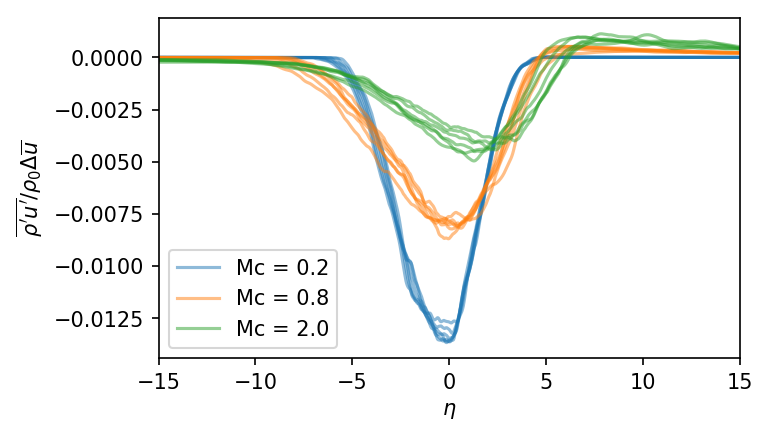

In [87]:
s = '7'

Mc_list = ['02','08','20']
    
fig = plt.figure(figsize=(5,3),dpi=150)

for i,Mc in enumerate(Mc_list):
    directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr%s/1024x1448x512/'%(Mc,s)
    filename_prefix = directory + '/shearlayer_'
    inp = nml.inputs(directory)
    
    flist = glob.glob(directory+"massflux*")
    flist.sort()
    print(inp.Mc)
    for j,fname in enumerate(flist[1:]):
        tID = fname.split('/')[-1]
        tID = tID.split('_')[-1]
        tID = int(tID.split('.')[0])
        time = nml.read_time(directory,tID)

        # Get dtheta
        idx = np.argmin(abs(tlist-time))
        dtheta = dlist[idx]
        eta = y/dtheta

        ubar,vbar,utilde,vtilde,ru,rv = get_data(fname)
        if j==0: plt.plot(eta,rv/inp.du,color='C%i'%i,alpha=0.5,label='Mc = {}'.format(inp.Mc))
        else: plt.plot(eta,rv/inp.du,color='C%i'%i,alpha=0.5)
plt.xlim([-15,15])
plt.xlabel(r'$\eta$')
plt.ylabel(r"$\overline{\rho'u'}/\rho_0\Delta \overline{u}$")
plt.legend()
print(inp.Mc,inp.rr)

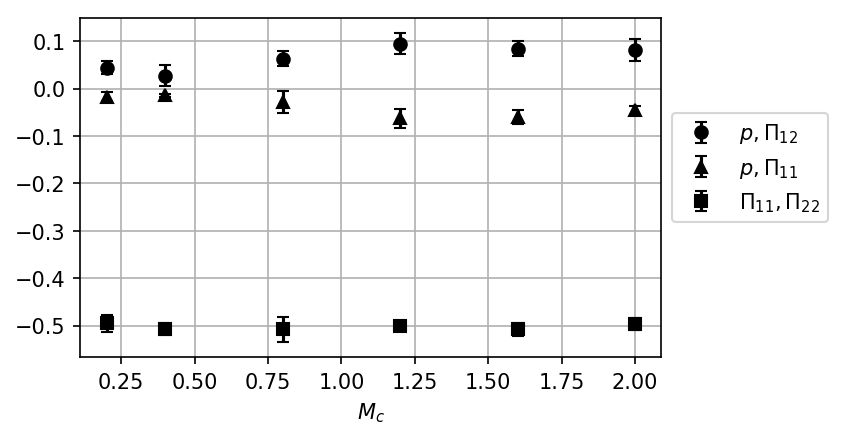

In [96]:
# Using Nx/4=256 modes

def plotter(dat,fmt,label):
    plt.errorbar(dat.keys(),[x[0] for x in dat.values()],
        yerr=[x[1] for x in dat.values()],fmt=fmt,capsize=3,label=label)

fig = plt.figure(figsize=(5,3),dpi=150)
#plotter(p_p12,'ko','$p,\Pi_{12}$')

plt.xlabel('$M_c$')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 0.75))